In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box
import numpy as np


In [7]:
import rioxarray as rxr
import matplotlib.pyplot as plt

ndvi_fp = r"OCM2_NDVI_BAR_V02_01.TIF"


ndvi = rxr.open_rasterio(ndvi_fp, masked=True).squeeze()
ndvi.rio.write_crs("EPSG:4326", inplace=True)

print("CRS:", ndvi.rio.crs)
print("Bounds:", ndvi.rio.bounds())
print("Resolution:", ndvi.rio.resolution())


CRS: EPSG:4326
Bounds: (0.0, 0.0, 332.0, 495.0)
Resolution: (1.0, 1.0)


c:\Users\nishi\OneDrive\Desktop\Satelitte\.venv\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [ ]:

print("TYPE:", type(ndvi))
print("DIMS:", getattr(ndvi, "dims", None))
print("SHAPE:", getattr(ndvi, "shape", None))
print("NDIM:", getattr(ndvi, "ndim", None))
ndvi


TYPE: <class 'xarray.core.dataarray.DataArray'>
DIMS: ('band', 'y', 'x')
SHAPE: (3, 495, 332)
NDIM: 3


<xarray.DataArray (band: 3, y: 495, x: 332)> Size: 2MB
[493020 values with dtype=float32]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * y            (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 491.5 492.5 493.5 494.5
  * x            (x) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 328.5 329.5 330.5 331.5
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:     96
    TIFFTAG_YRESOLUTION:     96
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    scale_factor:            1.0
    add_offset:              0.0

In [12]:
print("NDVI Data Info:")
print("----------------")
print("CRS:", ndvi.rio.crs)
print("Dimensions:", ndvi.dims)
print("Shape:", ndvi.shape)
print("Resolution:", ndvi.rio.resolution())
print("Value Range:", float(ndvi.min()), "to", float(ndvi.max()))


NDVI Data Info:
----------------
CRS: EPSG:4326
Dimensions: ('band', 'y', 'x')
Shape: (3, 495, 332)
Resolution: (1.0, 1.0)
Value Range: 0.0 to 255.0


In [13]:
import numpy as np

arr = ndvi.values
valid = arr[~np.isnan(arr)]

print("NDVI Dataset Summary:")
print(f"Min NDVI: {valid.min():.3f}")
print(f"Max NDVI: {valid.max():.3f}")
print(f"Mean NDVI: {valid.mean():.3f}")
print(f"Median NDVI: {np.median(valid):.3f}")
print(f"Std. Deviation: {valid.std():.3f}")
print(f"Valid Pixels: {valid.size}")


NDVI Dataset Summary:
Min NDVI: 0.000
Max NDVI: 255.000
Mean NDVI: 224.904
Median NDVI: 255.000
Std. Deviation: 71.625
Valid Pixels: 493020


In [ ]:

import numpy as np
import xarray as xr

print("TYPE:", type(ndvi))
print("DIMS:", getattr(ndvi, "dims", None))
print("SHAPE:", getattr(ndvi, "shape", None))
print("NDIM:", getattr(ndvi, "ndim", None))


try:
    print("COORDS sample keys:", list(ndvi.coords.keys())[:5])
except Exception:
    pass


arr = getattr(ndvi, "values", None)
if arr is None:
    print("No .values attribute found (object not a DataArray).")
else:
    print("dtype:", arr.dtype)
    print("min/max (ignoring NaN):", np.nanmin(arr), np.nanmax(arr))
    print("nan count:", np.isnan(arr).sum(), "total pixels:", arr.size)


TYPE: <class 'xarray.core.dataarray.DataArray'>
DIMS: ('band', 'y', 'x')
SHAPE: (3, 495, 332)
NDIM: 3
COORDS sample keys: ['band', 'x', 'y', 'spatial_ref']
dtype: float32
min/max (ignoring NaN): 0.0 255.0
nan count: 0 total pixels: 493020


In [ ]:

ndvi_single = ndvi.isel(band=0)


print("DIMS:", ndvi_single.dims)
print("SHAPE:", ndvi_single.shape)


DIMS: ('y', 'x')
SHAPE: (495, 332)


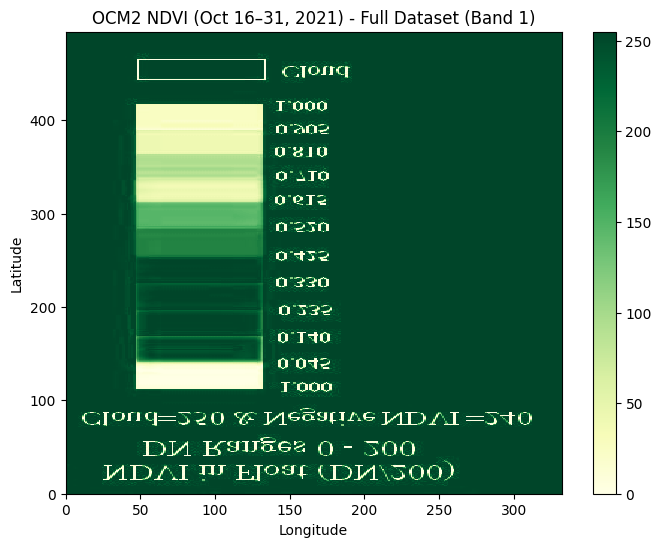

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
ndvi_single.plot(cmap='YlGn', vmin=0, vmax=255)
plt.title("OCM2 NDVI (Oct 16–31, 2021) - Full Dataset (Band 1)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


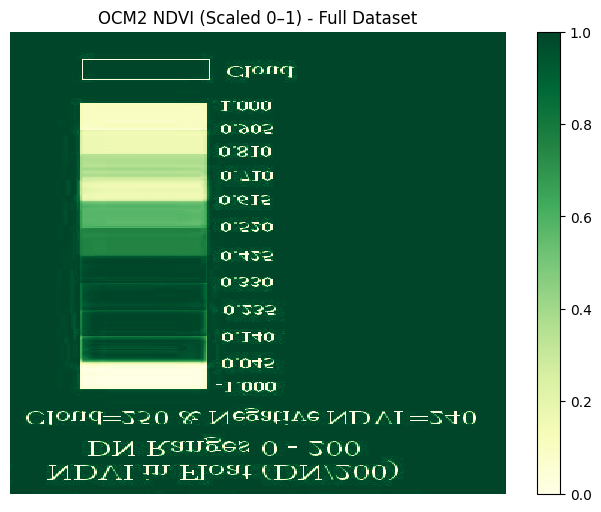

In [19]:
ndvi_scaled = ndvi_single / 255.0

plt.figure(figsize=(8,6))
ndvi_scaled.plot(cmap='YlGn', vmin=0, vmax=1)
plt.title("OCM2 NDVI (Scaled 0–1) - Full Dataset")
plt.axis("off")
plt.show()


In [20]:
print("Scaled NDVI range:", float(ndvi_scaled.min()), "to", float(ndvi_scaled.max()))


Scaled NDVI range: 0.0 to 1.0


In [21]:
import numpy as np

arr = ndvi.values
valid = arr[~np.isnan(arr)]

print("NDVI Dataset Summary:")
print(f"Min NDVI: {valid.min():.3f}")
print(f"Max NDVI: {valid.max():.3f}")
print(f"Mean NDVI: {valid.mean():.3f}")
print(f"Median NDVI: {np.median(valid):.3f}")
print(f"Std. Deviation: {valid.std():.3f}")
print(f"Valid Pixels: {valid.size}")


NDVI Dataset Summary:
Min NDVI: 0.000
Max NDVI: 255.000
Mean NDVI: 224.904
Median NDVI: 255.000
Std. Deviation: 71.625
Valid Pixels: 493020


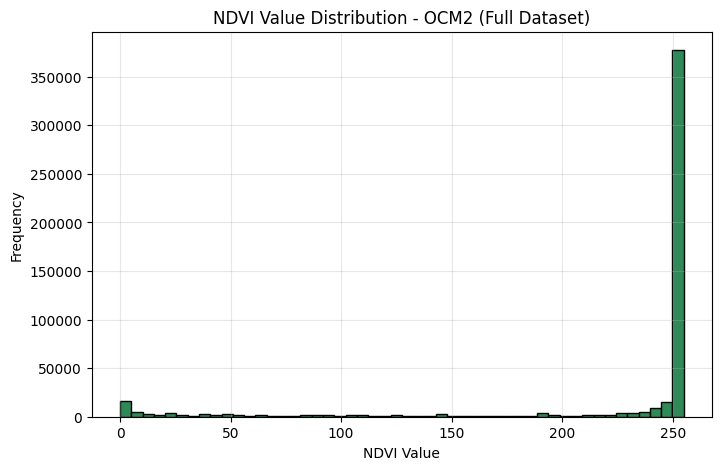

In [22]:
plt.figure(figsize=(8,5))
plt.hist(valid, bins=50, color='seagreen', edgecolor='black')
plt.title("NDVI Value Distribution - OCM2 (Full Dataset)")
plt.xlabel("NDVI Value")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


In [24]:
print("Unique Value Count (sample):", len(np.unique(valid)))
print("Min NDVI:", valid.min(), " Max NDVI:", valid.max())
print("Are there negative NDVI values?", np.any(valid < 0))


Unique Value Count (sample): 256
Min NDVI: 0.0  Max NDVI: 255.0
Are there negative NDVI values? False


---

## Summary of Findings

- The NDVI file contains **3 bands**, with Band-1 holding NDVI data.
- NDVI values range from **0–255**, which when scaled correspond to **0.0–1.0**.
- The dataset covers full India; not georeferenced but corrected using EPSG:4326.
- Histogram shows NDVI clustering near high values (~250), indicating dense vegetation or water reflection.
- No negative NDVI values detected → clean dataset.


---


